Airline Delay Prediction 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
#data = pd.read_csv("airline_2m 2.csv",encoding='Iso-8859-1', low_memory=False,nrows=1000000)
pd.set_option('display.max_columns', None)

In [15]:
data.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime,DivAirportLandings,DivReachedDest,DivActualElapsedTime,DivArrDelay,DivDistance,Div1Airport,Div1AirportID,Div1AirportSeqID,Div1WheelsOn,Div1TotalGTime,Div1LongestGTime,Div1WheelsOff,Div1TailNum,Div2Airport,Div2AirportID,Div2AirportSeqID,Div2WheelsOn,Div2TotalGTime,Div2LongestGTime,Div2WheelsOff,Div2TailNum,Div3Airport,Div3AirportID,Div3AirportSeqID,Div3WheelsOn,Div3TotalGTime,Div3LongestGTime,Div3WheelsOff,Div3TailNum,Div4Airport,Div4AirportID,Div4AirportSeqID,Div4WheelsOn,Div4TotalGTime,Div4LongestGTime,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum
0,1998,1,1,2,5,1998-01-02,NW,19386,NW,N297US,675,13487,1348701,31650,MSP,"Minneapolis, MN",MN,27.0,Minnesota,63,14869,1486902,34614,SLC,"Salt Lake City, UT",UT,49.0,Utah,87,1640,1659.0,19.0,19.0,1.0,1.0,1600-1659,24.0,1723.0,1856.0,3.0,1836,1859.0,23.0,23.0,1.0,1.0,1800-1859,0.0,NaN,0.0,176.0,180.0,153.0,1.0,991.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009,2,5,28,4,2009-05-28,FL,20437,FL,N946AT,671,13342,1334202,33342,MKE,"Milwaukee, WI",WI,55.0,Wisconsin,45,13204,1320401,31454,MCO,"Orlando, FL",FL,12.0,Florida,33,1204,1202.0,-2.0,0.0,0.0,-1.0,1200-1259,10.0,1212.0,1533.0,8.0,1541,1541.0,0.0,0.0,0.0,0.0,1500-1559,0.0,NaN,0.0,157.0,159.0,141.0,1.0,1066.0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013,2,6,29,6,2013-06-29,MQ,20398,MQ,N665MQ,3297,11921,1192102,31921,GJT,"Grand Junction, CO",CO,8.0,Colorado,82,11298,1129803,30194,DFW,"Dallas/Fort Worth, TX",TX,48.0,Texas,74,1630,1644.0,14.0,14.0,0.0,0.0,1600-1659,9.0,1653.0,1936.0,6.0,1945,1942.0,-3.0,0.0,0.0,-1.0,1900-1959,0.0,NaN,0.0,135.0,118.0,103.0,1.0,773.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010,3,8,31,2,2010-08-31,DL,19790,DL,N6705Y,1806,12892,1289201,32575,LAX,"Los Angeles, CA",CA,6.0,California,91,11433,1143301,31295,DTW,"Detroit, MI",MI,26.0,Michigan,43,1305,1305.0,0.0,0.0,0.0,0.0,1300-1359,23.0,1328.0,2008.0,7.0,2035,2015.0,-20.0,0.0,0.0,-2.0,2000-2059,0.0,NaN,0.0,270.0,250.0,220.0,1.0,1979.0,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2006,1,1,15,7,2006-01-15,US,20355,US,N504AU,465,11618,1161801,31703,EWR,"Newark, NJ",NJ,34.0,New Jersey,21,11057,1105702,31057,CLT,"Charlotte, NC",NC,37.0,North Carolina,36,1820,1911.0,51.0,51.0,1.0,3.0,1800-1859,19.0,1930.0,2050.0,8.0,2026,2058.0,32.0,32.0,1.0,2.0,2000-2059,0.0,NaN,0.0,126.0,107.0,80.0,1.0,529.0,3,0.0,0.0,0.0,0.0,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [16]:
data.shape

(1000000, 109)

Dropping a whole load of columns because none of our planes were diverted and so many of those columns are empty 

In [17]:
df2 = data.loc[:, data.isnull().mean() < .8]

In [18]:
df2.shape

(1000000, 56)

In [19]:
df2.describe()

,Year,Quarter,Month,DayofMonth,DayOfWeek,DOT_ID_Reporting_Airline,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,OriginStateFips,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,DestStateFips,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,Cancelled,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,DivAirportLandings
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,999693.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,999715.000000,1000000.000000,1000000.000000,981986.000000,981949.000000,981949.000000,981949.000000,981949.000000,792296.000000,792280.000000,791133.000000,791180.000000,1000000.000000,980212.000000,979392.000000,979392.000000,979392.000000,979392.000000,1000000.000000,1000000.000000,999846.000000,979404.000000,790372.000000,1000000.0,1000000.000000,1000000.000000,372766.000000
mean,2004.314727,2.499499,6.494977,15.723691,3.939902,19924.501227,1718.461741,12717.879395,1.271790e+06,31734.005287,26.865834,55.237172,12721.431949,1.272145e+06,31733.239814,26.856167,55.267968,1332.215176,1343.276413,8.632705,10.538743,0.169575,0.068372,15.801444,1363.086074,1480.111526,6.719837,1492.292030,1487.451117,6.256660,11.839455,0.198119,-0.071666,0.018227,0.002369,127.173743,125.033261,106.011069,1.0,733.837668,3.410578,0.003777
std,9.229159,1.118143,3.443484,8.777843,1.990003,366.581729,1660.067582,1534.411592,1.534409e+05,1302.358001,16.436477,26.744635,1534.286066,1.534284e+05,1302.842458,16.430587,26.681087,476.845145,481.978157,32.933459,32.186689,0.375259,1.829170,10.271634,485.724502,506.762627,8.008437,495.828963,506.448847,35.164074,32.332120,0.398582,1.998036,0.133771,0.048615,70.413749,70.378149,68.598588,0.0,568.630395,2.243521,0.116815
min,1987.000000,1.000000,1.000000,1.000000,1.000000,19386.000000,1.000000,10135.000000,1.013501e+06,30070.000000,1.000000,1.000000,10135.000000,1.013501e+06,30070.000000,1.000000,1.000000,0.000000,1.000000,-82.000000,0.000000,0.000000,-2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,-90.000000,0.000000,0.000000,-2.000000,0.000000,0.000000,0.000000,-148.000000,-686.000000,1.0,11.000000,1.000000,0.000000
25%,1997.000000,1.000000,3.000000,8.000000,2.000000,19704.000000,521.000000,11292.000000,1.129202e+06,30647.000000,12.000000,34.000000,11292.000000,1.129202e+06,30647.000000,12.000000,34.000000,925.000000,930.000000,-3.000000,0.000000,0.000000,-1.000000,10.000000,943.000000,1104.000000,4.000000,1114.000000,1111.000000,-10.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,75.000000,73.000000,56.000000,1.0,325.000000,2.000000,0.000000
50%,2005.000000,3.000000,7.000000,16.000000,4.000000,19805.000000,1167.000000,12892.000000,1.289201e+06,31453.000000,26.000000,52.000000,12892.000000,1.289201e+06,31453.000000,26.000000,52.000000,1325.000000,1331.000000,0.000000,0.000000,0.000000,0.000000,13.000000,1344.000000,1514.000000,5.000000,1520.000000,1518.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,109.000000,107.000000,87.000000,1.0,581.000000,3.000000,0.000000
75%,2012.000000,3.000000,9.000000,23.000000,6.000000,20355.000000,2210.000000,14057.000000,1.405702e+06,32575.000000,42.000000,81.000000,14057.000000,1.405702e+06,32575.000000,42.000000,81.000000,1728.000000,1737.000000,7.000000,7.000000,0.000000,0.000000,18.000000,1751.000000,1910.000000,8.000000,1914.000000,1916.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,159.000000,156.000000,135.000000,1.0,967.000000,4.000000,0.000000
max,2020.000000,4.000000,12.000000,31.000000,7.000000,21171.000000,9794.000000,16869.000000,1.686901e+06,36101.000000,78.000000,841.000000,16869.000000,1.686901e+06,36101.000000,78.000000,841.000000,2400.000000,2400.000000,1878.00

In [20]:
df2.info

<bound method DataFrame.info of         Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate  \
0       1998        1      1           2          5  1998-01-02   
1       2009        2      5          28          4  2009-05-28   
2       2013        2      6          29          6  2013-06-29   
3       2010        3      8          31          2  2010-08-31   
4       2006        1      1          15          7  2006-01-15   
...      ...      ...    ...         ...        ...         ...   
999995  2018        4     10          13          6  2018-10-13   
999996  2009        4     12           3          4  2009-12-03   
999997  2010        3      7           5          1  2010-07-05   
999998  1989        1      3          21          2  1989-03-21   
999999  2014        1      1           2          4  2014-01-02   

       Reporting_Airline  DOT_ID_Reporting_Airline  \
0                     NW                     19386   
1                     FL                     20437   
2

In [21]:
df2.corr()

,Year,Quarter,Month,DayofMonth,DayOfWeek,DOT_ID_Reporting_Airline,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,OriginStateFips,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,DestStateFips,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,Cancelled,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,DivAirportLandings
Year,1.000000,-0.036998,-0.035853,-0.000757,-0.002725,0.146069,0.371085,-0.035091,-0.035087,0.000862,-0.027170,0.000867,-0.033033,-0.033028,0.002463,-0.029631,0.000591,-0.007212,-0.016440,0.027012,0.056650,0.042185,-0.013365,0.062042,-0.011996,-0.017056,0.071858,0.005849,-0.015510,-0.022047,0.031328,-0.006122,-0.032091,0.007877,0.000326,0.144732,0.121648,0.060871,NaN,0.093605,0.095260,-0.003091
Quarter,-0.036998,1.000000,0.971269,0.008345,0.001280,-0.008811,-0.009681,-0.001411,-0.001411,-0.002674,0.001547,0.003781,0.001021,0.001021,-0.001979,0.000711,0.003668,-0.003982,-0.004425,-0.006267,-0.007089,-0.009420,-0.007624,-0.002516,-0.004210,-0.002981,0.002213,-0.003149,-0.002794,-0.007118,-0.009522,-0.010069,-0.008449,-0.027400,-0.002894,-0.005082,-0.005588,-0.002865,NaN,0.001094,0.001034,-0.003688
Month,-0.035853,0.971269,1.000000,0.006620,0.001655,-0.008779,-0.008768,-0.001248,-0.001248,-0.002648,0.001511,0.004015,0.000945,0.000945,-0.002117,0.000631,0.003766,-0.004443,-0.004366,-0.004170,-0.005057,-0.006369,-0.005415,-0.002470,-0.004427,-0.003431,0.002454,-0.003677,-0.003015,-0.005232,-0.007550,-0.007430,-0.006432,-0.024342,-0.002650,-0.004388,-0.004983,-0.002594,NaN,0.001364,0.001287,-0.003632
DayofMonth,-0.000757,0.008345,0.006620,1.000000,0.000269,0.001175,0.001615,-0.001375,-0.001375,-0.002090,-0.001354,0.000639,-0.001150,-0.001150,0.000375,0.000206,-0.001129,0.001528,-0.001572,0.007078,0.006700,0.008719,0.008268,0.000700,-0.001900,-0.003610,0.000083,0.001202,-0.003620,0.005630,0.005436,0.005875,0.006175,-0.000439,-0.000017,0.001313,0.000725,0.000908,NaN,0.001443,0.001179,-0.000149
DayOfWeek,-0.002725,0.001280,0.001655,0.000269,1.000000,0.002384,0.008888,0.001919,0.001919,0.001434,-0.002883,0.000636,0.001191,0.001191,0.001020,-0.002815,0.000249,0.004954,0.004450,0.005883,0.005304,0.007955,0.005977,-0.016732,0.003524,0.004677,0.005972,0.005654,0.003792,-0.004237,-0.001081,-0.001817,-0.005041,-0.011715,-0.000265,0.012638,0.007760,0.010933,NaN,0.013587,0.013758,-0.000222
DOT_ID_Reporting_Airline,0.146069,-0.008811,-0.008779,0.001175,0.002384,1.000000,0.391446,-0.030819,-0.030818,0.000047,0.043136,-0.149567,-0.028011,-0.028011,0.002770,0.040566,-0.150452,0.004591,-0.000949,0.008173,0.026337,0.005872,-0.012101,0.132066,0.000620,-0.014026,0.061713,-0.006596,-0.010369,0.021367,0.036664,0.024036,0.020943,0.028821,0.000522,-0.033702,-0.025307,-0.067123,NaN,-0.065219,-0.062146,0.005944
Flight_Number_Reporting_Airline,0.371085,-0.009681,-0.008768,0.001615,0.008888,0.391446,1.000000,-0.032551,-0.032550,0.046694,0.014574,0.047419,-0.031754,-0.031753,0.048562,0.012061,0.045599,-0.001148,-0.001300,0.021373,0.037286,0.026933,0.008381,0.028480,0.004774,-0.014234,0.020562,-0.008683,-0.011497,0.011586,0.030329,0.008917,0.008150,0.033161,0.000575,-0.201098,-0.205237,-0.273158,NaN,-0.237729,-0.234468,0.011685
OriginAirportID,-0.035091,-0.001411,-0.001248,-0.001375,0.001919,-0.030819,-0.032551,1.000000,1.000000,0.582700,-0.091358,0.264023,0.023055,0.023055,0.002992,-0.062624,0.141933,-0.032661,-0.032206,-0.007045,-0.006508,-0.008276,-0.005797,-0.059672,-0.034576,-0.001155,0.007534,-0.002671,0.000582,-0.006802,-0.008610,-0.012862,-0.008626,-0.005734,0.000406,0.039840,0.039896,0.053463,NaN,0.066638,0.071527,0.001542
OriginAirportSeqID,-0.035087,-0.001411,-0.001248,-0.001375,0.001919,-0.030818,-0.032550,1.000000,1.000000,0.582700,-0.091358,0.264023,0.023055,0.023055,0.002992,-0.062624,0.141933,-0.032661,-0.032206,-0.007

Which airlines have the most late flights? 

In [22]:
df2['Reporting_Airline'].value_counts()

WN        152916
DL        132262
AA        117269
UA         97135
US         86157
NW         54902
OO         53528
CO         45435
MQ         39362
EV         33820
AS         24998
TW         19243
HP         18757
B6         18710
XE         17863
FL         12994
OH         12405
YV         11175
9E          9793
F9          7146
HA          5755
EA          4703
PI          4509
NK          4355
YX          3800
DH          3577
VX          1984
PA (1)      1619
G4          1135
TZ          1074
KH           802
PS           433
ML (1)       384
Name: Reporting_Airline, dtype: int64

<AxesSubplot:>

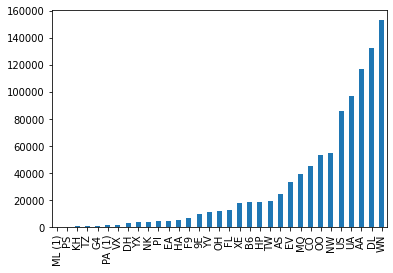

In [23]:
df2['Reporting_Airline'].value_counts().sort_values().plot(kind = 'bar')

In [24]:
list(df2.columns.values) 

['Year',
 'Quarter',
 'Month',
 'DayofMonth',
 'DayOfWeek',
 'FlightDate',
 'Reporting_Airline',
 'DOT_ID_Reporting_Airline',
 'IATA_CODE_Reporting_Airline',
 'Tail_Number',
 'Flight_Number_Reporting_Airline',
 'OriginAirportID',
 'OriginAirportSeqID',
 'OriginCityMarketID',
 'Origin',
 'OriginCityName',
 'OriginState',
 'OriginStateFips',
 'OriginStateName',
 'OriginWac',
 'DestAirportID',
 'DestAirportSeqID',
 'DestCityMarketID',
 'Dest',
 'DestCityName',
 'DestState',
 'DestStateFips',
 'DestStateName',
 'DestWac',
 'CRSDepTime',
 'DepTime',
 'DepDelay',
 'DepDelayMinutes',
 'DepDel15',
 'DepartureDelayGroups',
 'DepTimeBlk',
 'TaxiOut',
 'WheelsOff',
 'WheelsOn',
 'TaxiIn',
 'CRSArrTime',
 'ArrTime',
 'ArrDelay',
 'ArrDelayMinutes',
 'ArrDel15',
 'ArrivalDelayGroups',
 'ArrTimeBlk',
 'Cancelled',
 'Diverted',
 'CRSElapsedTime',
 'ActualElapsedTime',
 'AirTime',
 'Flights',
 'Distance',
 'DistanceGroup',
 'DivAirportLandings']

In [25]:
df2.dtypes

Year                                 int64
Quarter                              int64
Month                                int64
DayofMonth                           int64
DayOfWeek                            int64
FlightDate                          object
Reporting_Airline                   object
DOT_ID_Reporting_Airline             int64
IATA_CODE_Reporting_Airline         object
Tail_Number                         object
Flight_Number_Reporting_Airline      int64
OriginAirportID                      int64
OriginAirportSeqID                   int64
OriginCityMarketID                   int64
Origin                              object
OriginCityName                      object
OriginState                         object
OriginStateFips                    float64
OriginStateName                     object
OriginWac                            int64
DestAirportID                        int64
DestAirportSeqID                     int64
DestCityMarketID                     int64
Dest       

In [26]:
df2.dtypes.value_counts()

float64    24
int64      18
object     14
dtype: int64

EDA: Flight Distance 

Text(0, 0.5, 'Frequency')

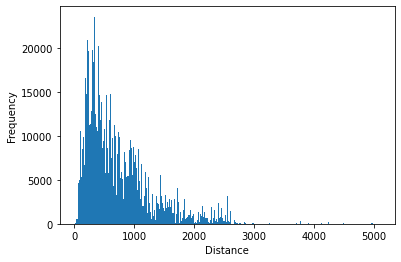

In [27]:
plt.hist(x=df2['Distance'], bins='auto')
plt.xlabel('Distance')
plt.ylabel('Frequency')

Plot elapsed time vs distance

Text(0, 0.5, 'Time')

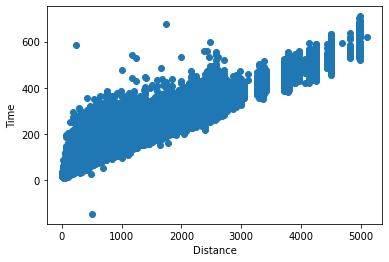

In [28]:
# Generate scatterplot of flight distance vs time
plt.scatter('Distance', 'ActualElapsedTime', data=df2)
plt.xlabel('Distance')
plt.ylabel('Time')

Plot arrival delay value counts 

<AxesSubplot:xlabel='ArrDelayMinutes'>

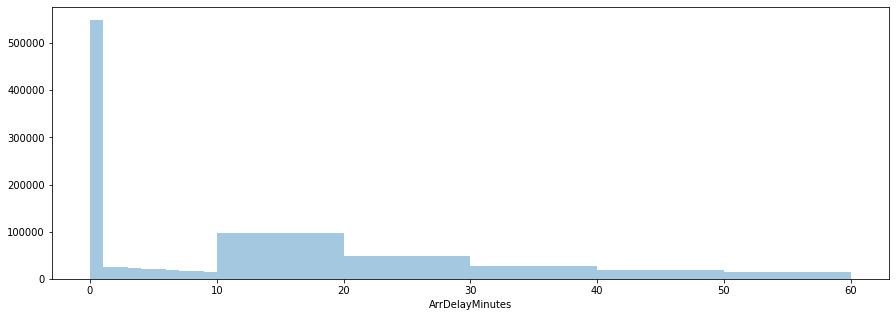

In [32]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.distplot(df2["ArrDelayMinutes"], kde=False,bins=[0,1,2,3,4,5,6,7,8,9,10,20,30,40,50,60])

array([[<AxesSubplot:title={'center':'ArrDelayMinutes'}>]], dtype=object)

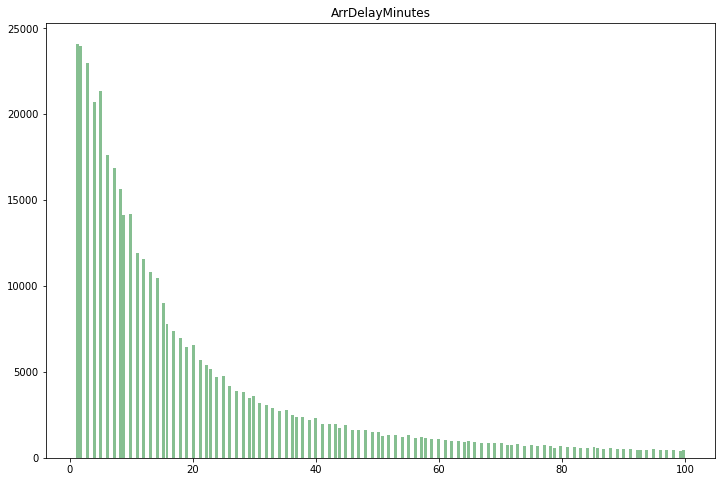

In [33]:
df2.hist(column='ArrDelayMinutes',bins='auto',grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9, range=[1,100])

Arrival delay by year 

Text(0, 0.5, 'Arrival Delay')

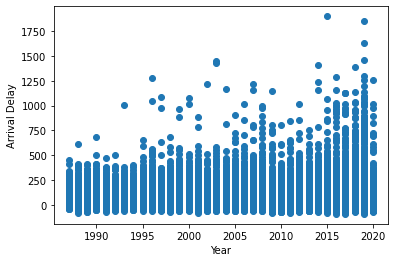

In [29]:
plt.scatter('Year', 'ArrDelay', data=df2)
plt.xlabel('Year')
plt.ylabel('Arrival Delay')

Arrival Delay 

Text(0, 0.5, 'Frequency')

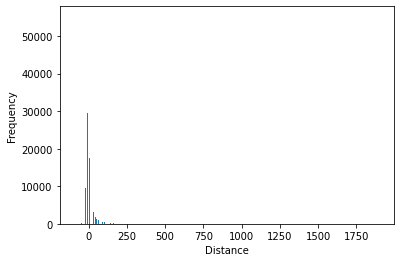

In [37]:
# Set missing values to 0
arvl_delay = df2['ArrDelay'].fillna(0)

plt.hist(x=arvl_delay, bins='auto')
plt.xlabel('Distance')
plt.ylabel('Frequency')

To show that arrival is normally distributed (some early, some late, but mostly on-time)

array([[<AxesSubplot:title={'center':'ArrDelay'}>]], dtype=object)

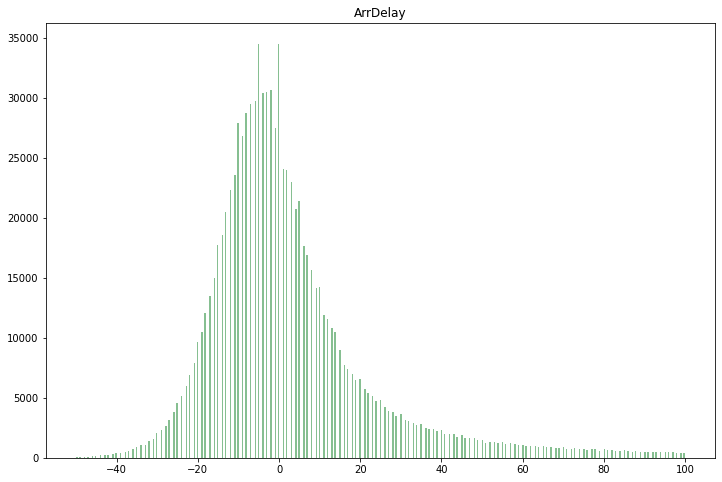

In [34]:
df2.hist(column='ArrDelay',bins='auto',grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9, range=[-50,100])

Correlations heatmap

<AxesSubplot:>

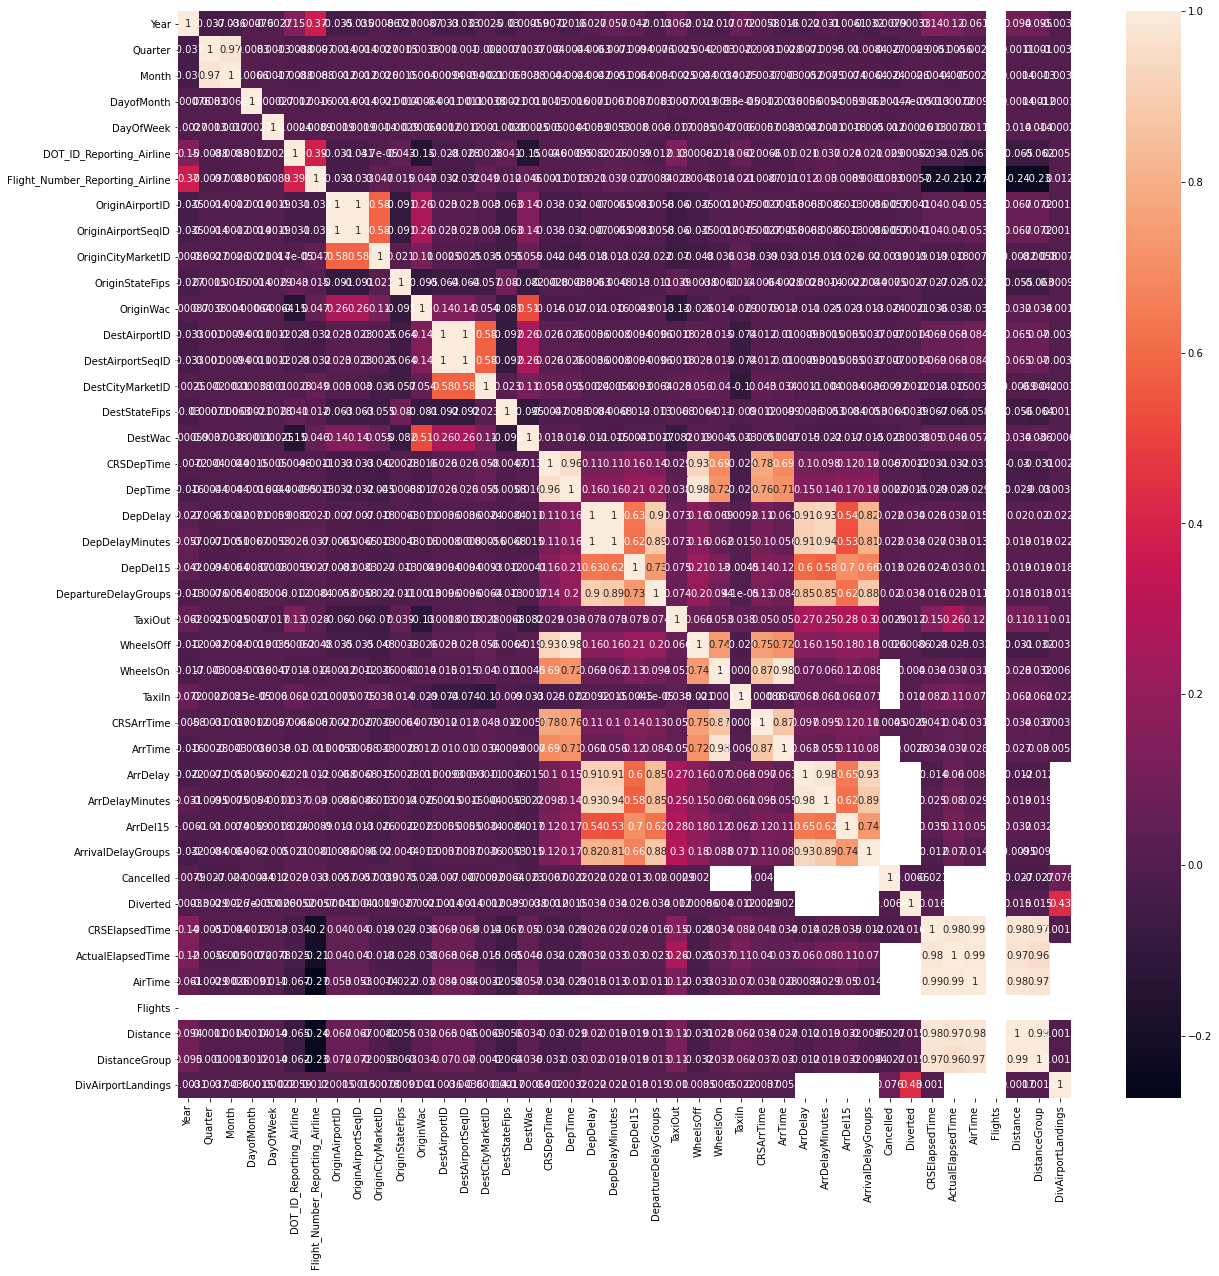

In [38]:
correlations=df2.corr()
f,ax=plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot=True)

Plotting sum of delays per year 

In [39]:
df3=df2.groupby(['Year'])['ArrDel15'].sum().reset_index()

Text(0, 0.5, 'Total_Delays')

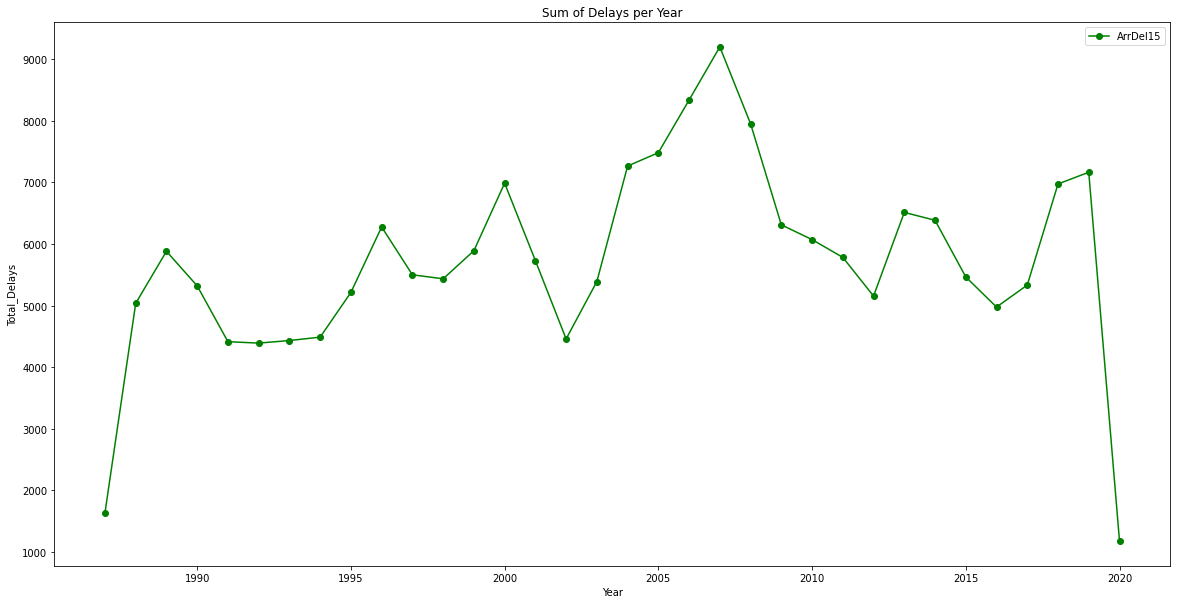

In [40]:
df3.plot(figsize = (20,10),x ='Year', y='ArrDel15', kind = 'line',color='green',marker='o')

plt.title('Sum of Delays per Year')
plt.xlabel('Year')
plt.ylabel('Total_Delays')

In [44]:
df4=df2.groupby(['Month'])['ArrDel15'].sum().reset_index()

Text(0, 0.5, 'Total_Delays')

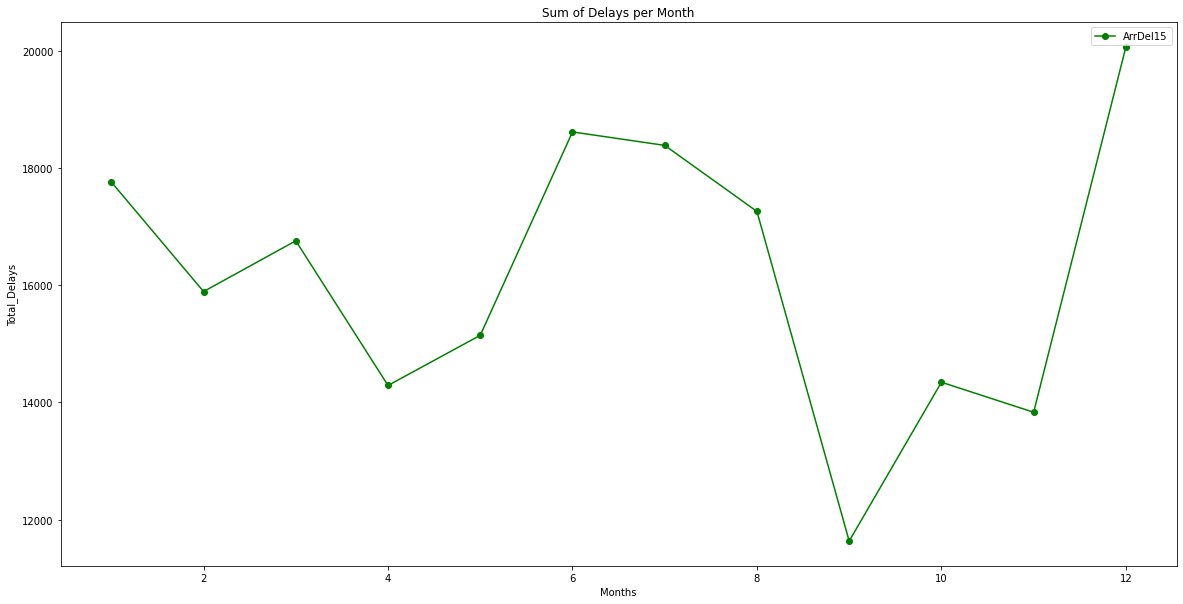

In [46]:
df4.plot(figsize = (20,10),x ='Month', y='ArrDel15', kind = 'line',color='green',marker='o')

plt.title('Sum of Delays per Month')
plt.xlabel('Months')
plt.ylabel('Total_Delays')

In [47]:
df5=df2.groupby(['DayOfWeek'])['ArrDel15'].sum().reset_index()

Text(0, 0.5, 'Total_Delays')

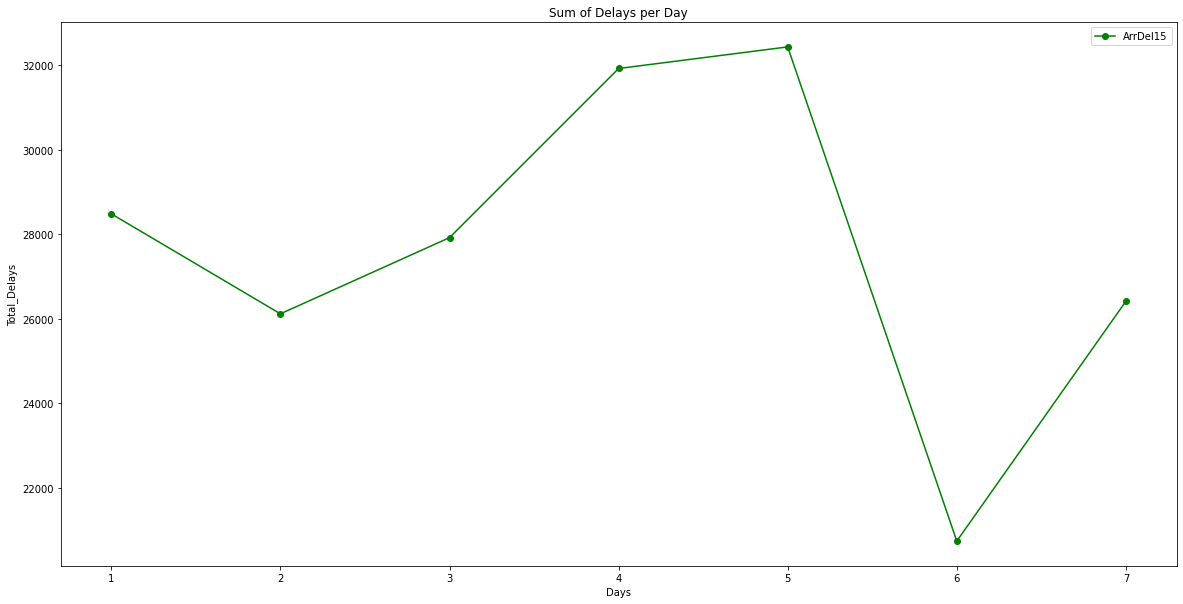

In [48]:
df5.plot(figsize = (20,10),x ='DayOfWeek', y='ArrDel15', kind = 'line',color='green',marker='o')

plt.title('Sum of Delays per Day')
plt.xlabel('Days')
plt.ylabel('Total_Delays')

Origin Airport? Do lots of flights leave late from particular airports? 

In [49]:
df6=df2.groupby(['OriginAirportID'])['ArrDel15'].sum().reset_index()

<AxesSubplot:>

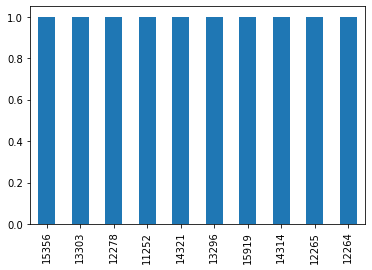

In [51]:
df6['OriginAirportID'].value_counts().sort_values(ascending=True)[:10].plot(kind = 'bar')

In [54]:
df6['OriginAirportID'].value_counts().sum()

403

Not sure how to work with this because there are so many airports. Plot a graph for just the worst airports? 

Arrival Airport? Do lots of flights arrive late to particular airports? 

Airtime: Similar to distance, but affected by wind direction etc 

In [55]:
df7=data.groupby(['AirTime'])['ArrDel15'].sum().reset_index()

Text(0, 0.5, 'No of flights over 15mins late')

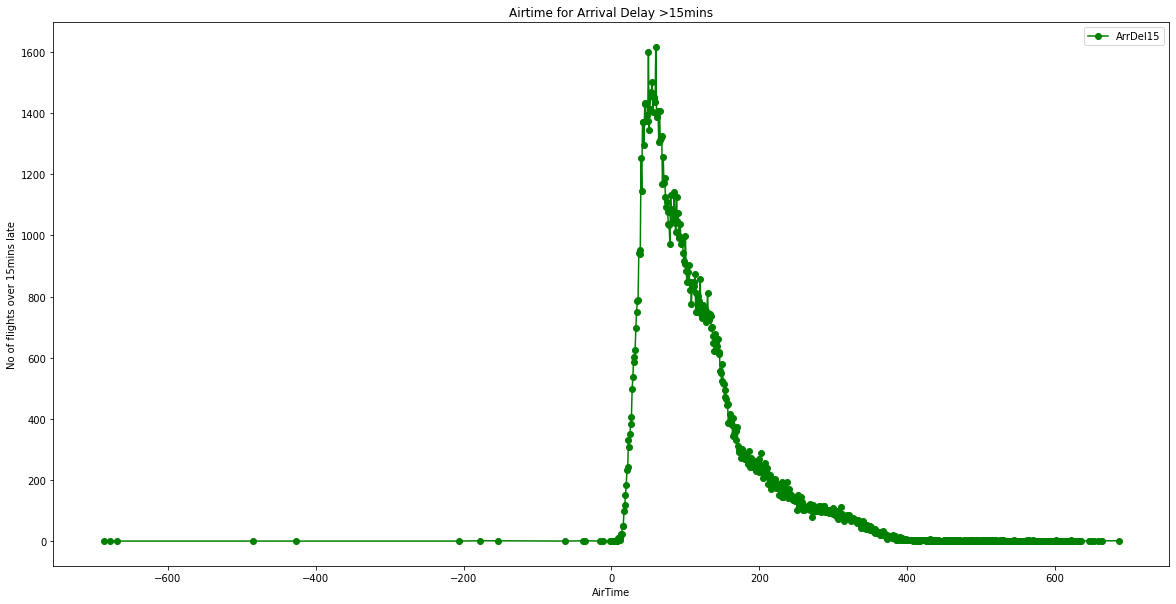

In [59]:
df7.plot(figsize = (20,10),x ='AirTime', y='ArrDel15', kind = 'line',color='green',marker='o')

plt.title('Airtime for Arrival Delay >15mins')
plt.xlabel('AirTime')
plt.ylabel('No of flights over 15mins late')

Text(0, 0.5, 'ArrDelay')

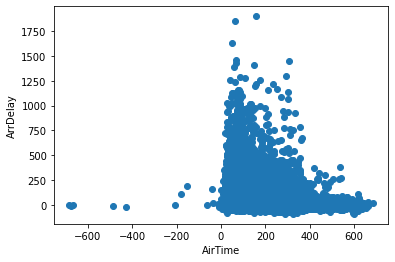

In [57]:
# Generate scatterplot of airtime v arrival delay 
plt.scatter('AirTime', 'ArrDelay', data=df2)
plt.xlabel('AirTime')
plt.ylabel('ArrDelay')

Obviously we must check Departure Delay with Arrival delay, because probably some departure delays can't be made up by flying more quickly, and will probably correlate. 

Text(0, 0.5, 'Arrival Delay')

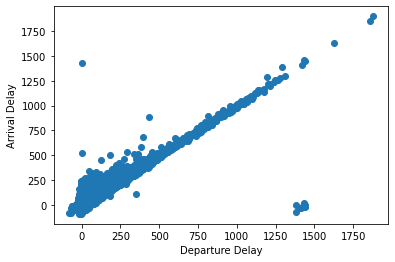

In [60]:
plt.scatter('DepDelay', 'ArrDelay', data=df2)
plt.xlabel('Departure Delay')
plt.ylabel('Arrival Delay')

Excellent linear correlation! 